In [5]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv("/Users/dhirenpagarani/Northeastern University/Fundamentals of Artificial Intelligence - EAI6000/HR ANALYTICS/HR_comma_sep.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3760,0.76,0.72,5,228,2,0,0,0,sales,high
9008,0.57,0.54,3,159,3,1,0,0,accounting,medium
13203,0.65,0.76,2,170,5,0,0,0,IT,low
6977,0.81,0.86,5,159,2,0,0,0,accounting,medium
13585,0.98,0.89,4,218,2,0,0,0,sales,medium
11876,0.40,0.47,5,173,5,0,0,0,technical,medium
5776,0.59,0.58,4,233,4,0,0,0,support,low
6711,0.76,0.62,4,190,3,0,0,0,RandD,medium
1892,0.44,0.52,2,141,3,0,1,0,management,low
9930,0.14,0.88,3,162,4,0,0,0,marketing,medium


In [60]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [61]:
print(data['Department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64


In [62]:
print(data['salary'].value_counts())

1    7316
2    6446
3    1237
Name: salary, dtype: int64


In [26]:
table = data.pivot_table(values='satisfaction_level', index='Department', columns='salary', aggfunc=np.count_nonzero)
table

salary,1,2,3
Department,,,
IT,609.0,535.0,83.0
RandD,364.0,372.0,51.0
accounting,358.0,335.0,74.0
hr,335.0,359.0,45.0
management,180.0,225.0,225.0
marketing,402.0,376.0,80.0
product_mng,451.0,383.0,68.0
sales,2099.0,1772.0,269.0
support,1146.0,942.0,141.0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
left = data[data.left==1]
left.shape


(3571, 10)

In [50]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


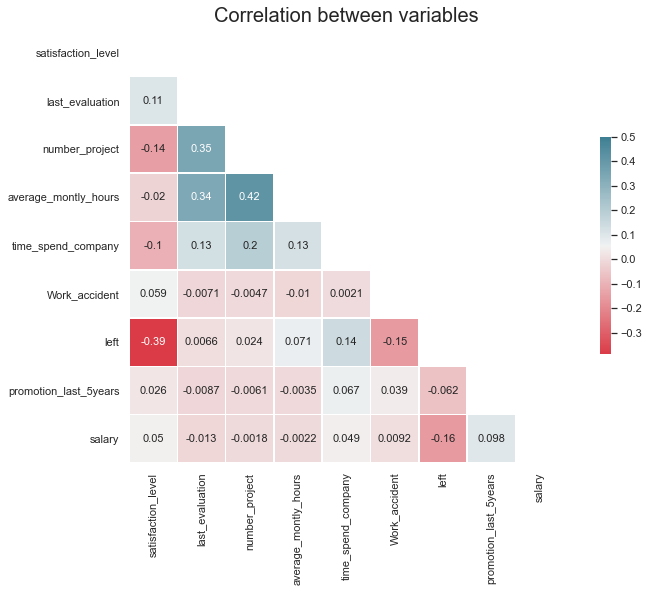

In [57]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,8))
cmap = sns.diverging_palette(10,220, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

In [71]:
retained = data[data.left==0]
left.shape

(3571, 10)

In [72]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


<AxesSubplot:xlabel='salary'>

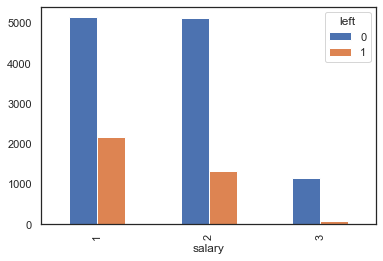

In [74]:
pd.crosstab(data.salary, data.left).plot(kind='bar') 

<AxesSubplot:xlabel='Department'>

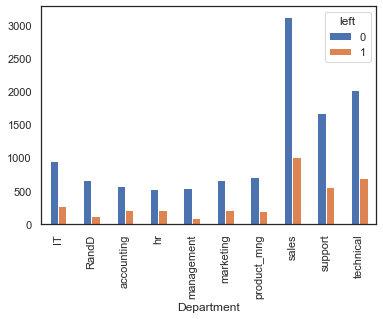

In [75]:
pd.crosstab(data.Department, data.left).plot(kind='bar')

In [77]:
subdf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [80]:
dummies = pd.get_dummies(data.salary, prefix='salary')
df3 = pd.concat([subdf, dummies], axis=1)
df3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_1,salary_2,salary_3
0,0.38,157,0,1,1,0,0
1,0.80,262,0,2,0,1,0
2,0.11,272,0,2,0,1,0
3,0.72,223,0,1,1,0,0
4,0.37,159,0,1,1,0,0


In [81]:
df4 = df3.drop(['salary', 'salary_1'], axis='columns')
df4.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_2,salary_3
0,0.38,157,0,0,0
1,0.80,262,0,1,0
2,0.11,272,0,1,0
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [83]:
X = df4
y = data.left

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [87]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
reg.score(X_test, y_test)
print("Accuracy on Training Set is: ", reg.score(X_train, y_train))
print("Accuracy on Testing Set is: ", reg.score(X_test, y_test))


Accuracy on Training Set is:  0.7775978664634727
Accuracy on Testing Set is:  0.7724444444444445


# Logistic Regression Model Error Table

In [111]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = reg.predict(X_test)
print('\t\tError Table')
print('Mean Absolute Error is: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Squared Error is: ', metrics.r2_score(y_test, y_pred))


		Error Table
Mean Absolute Error is:  0.22177777777777777
Mean Squared Error is:  0.22177777777777777
Root Mean Squared Error is:  0.47093288033198294
Root Squared Error is:  -0.23566677443097017


# Random Forest Classifier Model

In [112]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
randommodel = RandomForestClassifier()
randommodel.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
print('Random Model Accuracy on train data is:', randommodel.score(X_train, y_train))
print('Random Model Accuracy on test data is:', randommodel.score(X_test, y_test))

Random Model Accuracy on train data is: 0.9825697685493856
Random Model Accuracy on test data is: 0.9282222222222222


In [114]:
y_pred = randommodel.predict(X_test)
print('\t\tError Table')
print('Mean Absolute Error       :', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error        :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error   :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error       :', metrics.r2_score(y_test,y_pred))

		Error Table
Mean Absolute Error       : 0.07177777777777777
Mean Squared Error        : 0.07177777777777777
Root Mean Squared Error   : 0.2679137506321349
Mean Absolute Error       : 0.6067305223381663


# Building Decision Tree classifier Model

In [120]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
modeltree = tree.DecisionTreeClassifier()
modeltree.fit(X_train, y_train)

DecisionTreeClassifier()

In [121]:
print('Model Accuracy on train data:', modeltree.score(X_train,y_train))
print('Model Accuracy on test data :', modeltree.score(X_test,y_test))

Model Accuracy on train data: 0.9827602628821792
Model Accuracy on test data : 0.9193333333333333


In [122]:
y_pred = modeltree.predict(X_test)
print("\t\tError Table")
print('Mean Absolute Error     : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error         : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error     :  0.08066666666666666
Mean Squared Error      :  0.08066666666666666
Root Mean Squared Error :  0.28401877872187725
R Squared Error         :  0.5577485380116959


# Area Under-Receiving Operating Characteristic Curve Evaluation Metric

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities
y_score1 = reg.predict_proba(X_test)[:,1]
y_score2 = modeltree.predict_proba(X_test)[:,1]
y_score3 = randommodel.predict_proba(X_test)[:,1]
# Creating true and false positive rate
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

reg_roc_auc    = roc_auc_score(y_test, y_score1)
tree_roc_auc   = roc_auc_score(y_test, y_score2)
random_roc_auc = roc_auc_score(y_test, y_score3)

print('roc_auc_score for Logistic Regression: ', reg_roc_auc)
print('roc_auc_score for DecisionTree: ', tree_roc_auc)
print('roc_auc_score for RandomForest: ', random_roc_auc)

roc_auc_score for Logistic Regression:  0.7603901342863331
roc_auc_score for DecisionTree:  0.918928958197964
roc_auc_score for RandomForest:  0.988308154645874


# Plotting ROC Curve

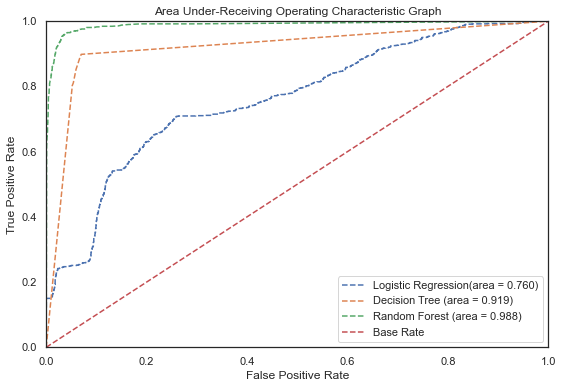

In [141]:
plt.figure(figsize=(9, 6))

# Plot Logistic Regression ROC
plt.plot(false_positive_rate1,true_positive_rate1,linestyle= '--',label='Logistic Regression(area = %0.3f)'
         % reg_roc_auc)

# Plot Decision Tree ROC
plt.plot(false_positive_rate2,true_positive_rate2,linestyle= '--',label='Decision Tree (area = %0.3f)'
         % tree_roc_auc)

# Plot Random Forest ROC
plt.plot(false_positive_rate3,true_positive_rate3,linestyle= '--',label='Random Forest (area = %0.3f)'
         % random_roc_auc)

#Plotting Base Rate ROC
plt.plot([0,1], [0,1], linestyle='--', label='Base Rate')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under-Receiving Operating Characteristic Graph')
plt.legend(loc="lower right")
plt.show()

# Conclusion

The higher the AUC, the better is the performance of the model at distiniguishing between the positive and negative classes.

From the above graph we can see that AUC for Decision Tree ROC curve(Area=97.7%) which is higher than Logistic model(Area=77.5%) and Random Forest model(Area=96.6%)

To conclude, Decision Tree did a better job in classifying the positive class in the dataset and gives the most accuracy in result.